In [1]:
from pyspark import SparkContext, SparkConf
import json
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
os.environ['SPARK_HOME'] = 'F:\spark-3.3.0-bin-hadoop3'
# Initialize Spark
conf = SparkConf().setAppName("BrandRatings")
sc = SparkContext(conf=conf)

In [15]:
# Load cellphone data
cellphone_rdd = sc.textFile("file:/D:/nus_course/CS5344-big data Analytics/Project/cellphone1.json")
cellphone_data = cellphone_rdd.map(lambda line: json.loads(line))

In [16]:
cellphone_data.take(5)

[{'asin': 'B001O7CLEQ',
  'overall': 5.0,
  'reviewTime': '05 11, 2016',
  'price': '$13.95',
  'brand': 'Samsung',
  'category': ['Cell Phones & Accessories',
   'Cell Phones',
   'Unlocked Cell Phones']},
 {'asin': 'B001O7CLEQ',
  'overall': 1.0,
  'reviewTime': '04 20, 2016',
  'price': '$13.95',
  'brand': 'Samsung',
  'category': ['Cell Phones & Accessories',
   'Cell Phones',
   'Unlocked Cell Phones']},
 {'asin': 'B001O7CLEQ',
  'overall': 5.0,
  'reviewTime': '04 5, 2016',
  'price': '$13.95',
  'brand': 'Samsung',
  'category': ['Cell Phones & Accessories',
   'Cell Phones',
   'Unlocked Cell Phones']},
 {'asin': 'B001O7CLEQ',
  'overall': 3.0,
  'reviewTime': '03 29, 2016',
  'price': '$13.95',
  'brand': 'Samsung',
  'category': ['Cell Phones & Accessories',
   'Cell Phones',
   'Unlocked Cell Phones']},
 {'asin': 'B001O7CLEQ',
  'overall': 5.0,
  'reviewTime': '03 15, 2016',
  'price': '$13.95',
  'brand': 'Samsung',
  'category': ['Cell Phones & Accessories',
   'Cell Phon

In [17]:
# Get the total ratings and number of reviews by brand
cellphone_data_count = cellphone_data.map(lambda item: (item["brand"], (item["overall"], 1)))
cellphone_data_count = cellphone_data_count.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
sorted_brands = cellphone_data_count.sortBy(lambda x: x[1], ascending=False)

In [18]:
# Get the 10 most popular brands
sorted_brands.take(10)

[('Samsung', (369273.0, 96151)),
 ('BLU', (207512.0, 55759)),
 ('Apple', (167315.0, 46495)),
 ('LG', (159228.0, 43009)),
 ('Motorola', (104451.0, 28173)),
 ('Nokia', (90593.0, 23627)),
 ('HTC', (54908.0, 15684)),
 ('BlackBerry', (51141.0, 12951)),
 ('Sony', (37077.0, 9743)),
 ('Huawei', (35212.0, 8852))]

In [19]:
# cellphone_2014 = cellphone_data.filter(cellphone_data.reviewTime.contains('2014'))
# filter the data of 2014,2015,2016,2017 respectively
cellphone_2014 = cellphone_data.filter(lambda x: "2014" in x["reviewTime"])
cellphone_2015 = cellphone_data.filter(lambda x: "2015" in x["reviewTime"])
cellphone_2016 = cellphone_data.filter(lambda x: "2016" in x["reviewTime"])
cellphone_2017 = cellphone_data.filter(lambda x: "2017" in x["reviewTime"])

In [20]:
# Map phrase
rating_data_2014 = cellphone_2014.map(lambda item: (item["brand"], (item["overall"], 1)))
rating_data_2015 = cellphone_2015.map(lambda item: (item["brand"], (item["overall"], 1)))
rating_data_2016 = cellphone_2016.map(lambda item: (item["brand"], (item["overall"], 1)))
rating_data_2017 = cellphone_2017.map(lambda item: (item["brand"], (item["overall"], 1)))
rating_data_2017.take(5)

[('Motorola', (1.0, 1)),
 ('Motorola', (1.0, 1)),
 ('Motorola', (5.0, 1)),
 ('Motorola', (4.0, 1)),
 ('Motorola', (5.0, 1))]

In [21]:
# Reduce by key to calculate the total rating and count for each brand
brand_ratings_2014 = rating_data_2014.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
brand_ratings_2015 = rating_data_2015.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
brand_ratings_2016 = rating_data_2016.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
brand_ratings_2017 = rating_data_2017.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# Calculate the average rating for each brand
average_ratings_2014 = brand_ratings_2014.map(lambda x: (x[0], x[1][0] / x[1][1],x[1][1]))
average_ratings_2015 = brand_ratings_2015.map(lambda x: (x[0], x[1][0] / x[1][1],x[1][1]))
average_ratings_2016 = brand_ratings_2016.map(lambda x: (x[0], x[1][0] / x[1][1],x[1][1]))
average_ratings_2017 = brand_ratings_2017.map(lambda x: (x[0], x[1][0] / x[1][1],x[1][1]))
average_ratings_2017.take(5)

[('Samsung', 3.4999010880316517, 15165),
 ('Apple', 3.4356639247943597, 13616),
 ('Palm', 2.4615384615384617, 13),
 ('Kyocera', 3.3840947546531304, 591),
 ('LGIC', 3.4523809523809526, 42)]

In [22]:
# count the total number if 2017 data
num_of_brand = average_ratings_2017.count()
num_of_brand

311

In [23]:
# Filter to include only brands with total number of reviews greater than 100
filtered_results_2017 = average_ratings_2017.filter(lambda x: x[2] > 100)
filtered_results_2016 = average_ratings_2016.filter(lambda x: x[2] > 100)
filtered_results_2015 = average_ratings_2015.filter(lambda x: x[2] > 100)
filtered_results_2014 = average_ratings_2014.filter(lambda x: x[2] > 100)

num_of_filter_2017 = filtered_results_2017.count()
num_of_filter_2017

30

In [24]:
# Sort the results by average rating in descending order
sorted_ratings_2014 = filtered_results_2014.sortBy(lambda x: x[1], ascending=False)
sorted_ratings_2015 = filtered_results_2015.sortBy(lambda x: x[1], ascending=False)
sorted_ratings_2016 = filtered_results_2016.sortBy(lambda x: x[1], ascending=False)
sorted_ratings_2017 = filtered_results_2017.sortBy(lambda x: x[1], ascending=False)

sorted_ratings_2017.take(5)

[('Raytine', 4.651612903225806, 155),
 ('OnePlus', 3.843601895734597, 211),
 ('Nextbit', 3.828828828828829, 555),
 ('Microsoft', 3.732943469785575, 513),
 ('TRACFONE WIRELESS, INC.', 3.669172932330827, 133)]

In [25]:
# Collect and print the results
data_2017 = filtered_results_2017.sortBy(lambda x: x[2], ascending=False)
cellphone_results = data_2017.collect()
for result in cellphone_results:
    print("Brand: {}, Average Rating: {:.2f}, Total Ratings: {}".format(result[0], result[1], result[2]))

Brand: Samsung, Average Rating: 3.50, Total Ratings: 15165
Brand: Apple, Average Rating: 3.44, Total Ratings: 13616
Brand: BLU, Average Rating: 3.26, Total Ratings: 6114
Brand: LG, Average Rating: 3.19, Total Ratings: 5729
Brand: Motorola, Average Rating: 3.44, Total Ratings: 3876
Brand: HTC, Average Rating: 3.11, Total Ratings: 1542
Brand: Sony, Average Rating: 3.48, Total Ratings: 1253
Brand: ZTE, Average Rating: 3.62, Total Ratings: 1240
Brand: BlackBerry, Average Rating: 3.60, Total Ratings: 1191
Brand: Huawei, Average Rating: 3.37, Total Ratings: 1185
Brand: Nokia, Average Rating: 3.23, Total Ratings: 1156
Brand: Tracfone, Average Rating: 3.62, Total Ratings: 934
Brand: GreatCall, Average Rating: 3.58, Total Ratings: 794
Brand: Kyocera, Average Rating: 3.38, Total Ratings: 591
Brand: Nextbit, Average Rating: 3.83, Total Ratings: 555
Brand: Asus, Average Rating: 3.22, Total Ratings: 527
Brand: Microsoft, Average Rating: 3.73, Total Ratings: 513
Brand: Posh Mobile, Average Rating: 2

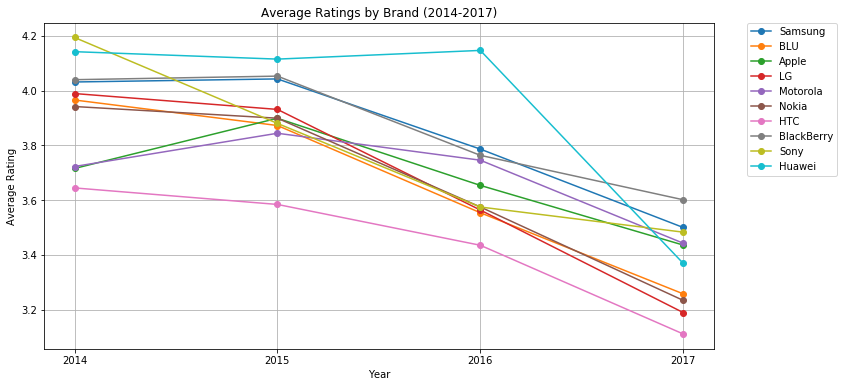

In [26]:
import matplotlib.pyplot as plt
# Collect the filtered results as a list
brand = ['Samsung','BLU','Apple','LG','Motorola','Nokia','HTC','BlackBerry','Sony','Huawei']
sorted_ratings = {
    2014: sorted_ratings_2014,
    2015: sorted_ratings_2015,
    2016: sorted_ratings_2016,
    2017: sorted_ratings_2017
}

# Brands to plot
brands_to_plot = ['Samsung','BLU','Apple','LG','Motorola','Nokia','HTC','BlackBerry','Sony','Huawei']

# Create a line chart for each year
plt.figure(figsize=(12, 6))

# for year, sorted_ratings_year in sorted_ratings.items():
#     data_by_brand = {brand: None for brand in brands_to_plot}
#     # Collect the data for the year
#     data_for_year = sorted_ratings_year.collect()
#     for brand in brands_to_plot:
#         avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
#         data_by_brand[brand] = avg_rating

# #     Create a line for each brand
#     for brand in brands_to_plot:
#         plt.plot(year, data_by_brand[brand], marker='o', label=f"{brand}")
    # Sort the ratings dictionary by year for plotting
#     for brand in brands_to_plot:
#         data_by_brand = dict(sorted(data_by_brand.items()))

#         # Create a line for each brand
#         plt.plot(year, list(data_by_brand.values()), marker='o', label=brand)
for brand in brands_to_plot:
    x = [2014,2015,2016,2017]
    y = []
#     data_for_2014 = sorted_ratings_2014.collect()
#     avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
    for year, sorted_ratings_year in sorted_ratings.items():
        data_for_year = sorted_ratings_year.collect()
        avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
        y.append(avg_rating)
    plt.plot(x,y, marker='o', label=f"{brand}")
plt.xticks(x)    
    

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Brand (2014-2017)')
plt.legend()
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

plt.show()

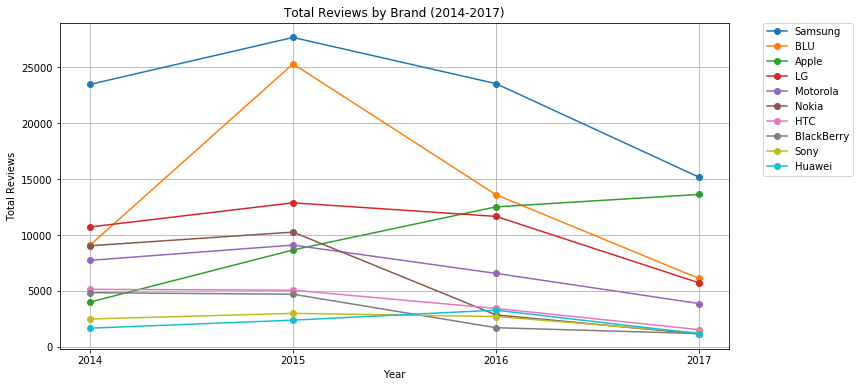

In [27]:
brand = ['Samsung','BLU','Apple','LG','Motorola','Nokia','HTC','BlackBerry','Sony','Huawei']
sorted_ratings = {
    2014: sorted_ratings_2014,
    2015: sorted_ratings_2015,
    2016: sorted_ratings_2016,
    2017: sorted_ratings_2017
}

# Brands to plot
brands_to_plot = ['Samsung','BLU','Apple','LG','Motorola','Nokia','HTC','BlackBerry','Sony','Huawei']

# Create a line chart for each year
plt.figure(figsize=(12, 6))

# for year, sorted_ratings_year in sorted_ratings.items():
#     data_by_brand = {brand: None for brand in brands_to_plot}
#     # Collect the data for the year
#     data_for_year = sorted_ratings_year.collect()
#     for brand in brands_to_plot:
#         avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
#         data_by_brand[brand] = avg_rating

# #     Create a line for each brand
#     for brand in brands_to_plot:
#         plt.plot(year, data_by_brand[brand], marker='o', label=f"{brand}")
    # Sort the ratings dictionary by year for plotting
#     for brand in brands_to_plot:
#         data_by_brand = dict(sorted(data_by_brand.items()))

#         # Create a line for each brand
#         plt.plot(year, list(data_by_brand.values()), marker='o', label=brand)
for brand in brands_to_plot:
    x = [2014,2015,2016,2017]
    y = []
#     data_for_2014 = sorted_ratings_2014.collect()
#     avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
    for year, sorted_ratings_year in sorted_ratings.items():
        data_for_year = sorted_ratings_year.collect()
        avg_rating = next((rating[2] for rating in data_for_year if rating[0] == brand), None)
        y.append(avg_rating)
    plt.plot(x,y, marker='o', label=f"{brand}")
plt.xticks(x)    
    

plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.title('Total Reviews by Brand (2014-2017)')
plt.legend()
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

plt.show()

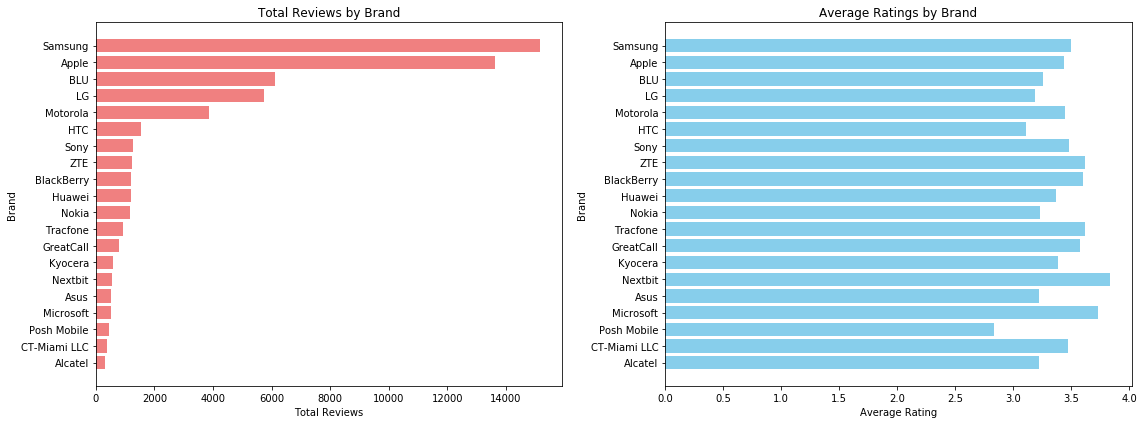

In [28]:
import matplotlib.pyplot as plt
# Collect the filtered results as a list
# brand = ['Samsung','BLU','Apple','LG','Motorola','Nokia','HTC','BlackBerry','Sony','Huawei']
results = data_2017.take(20)

# Separate the brand names and average ratings
brands = [result[0] for result in results]
average_ratings = [result[1] for result in results]
total_ratings = [result[2] for result in results]

# Create a bar plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot on the right: Total Ratings
axs[0].barh(brands, total_ratings, color='lightcoral')
axs[0].set_xlabel('Total Reviews')
axs[0].set_ylabel('Brand')
axs[0].set_title('Total Reviews by Brand')
axs[0].invert_yaxis()  # Invert the y-axis to display the highest total ratings at the top

# Plot on the left: Average Ratings
axs[1].barh(brands, average_ratings, color='skyblue')
axs[1].set_xlabel('Average Rating')
axs[1].set_ylabel('Brand')
axs[1].set_title('Average Ratings by Brand')
axs[1].invert_yaxis()  # Invert the y-axis to display the highest rating at the top


plt.tight_layout()  # Ensure the plots don't overlap
plt.show()

In [29]:
# Load accessory data
accessories_rdd = sc.textFile("file:/D:/nus_course/CS5344-big data Analytics/Project/accessories1.json")
accessories_data = accessories_rdd.map(lambda line: json.loads(line))
accessories_data.take(5)

[{'asin': '819940471X',
  'overall': 5.0,
  'reviewTime': '07 12, 2014',
  'price': '',
  'brand': 'Motorola',
  'category': ['Cell Phones & Accessories',
   'Accessories',
   'Chargers & Power Adapters',
   'Car Chargers']},
 {'asin': '8199607092',
  'overall': 5.0,
  'reviewTime': '01 24, 2016',
  'price': '',
  'brand': 'Nokia',
  'category': ['Cell Phones & Accessories',
   'Accessories',
   'Chargers & Power Adapters',
   'Wall Chargers']},
 {'asin': '8199900164',
  'overall': 5.0,
  'reviewTime': '08 13, 2014',
  'price': '',
  'brand': 'LG',
  'category': ['Cell Phones & Accessories',
   'Accessories',
   'Chargers & Power Adapters']},
 {'asin': '8199900164',
  'overall': 1.0,
  'reviewTime': '04 5, 2017',
  'price': '',
  'brand': 'LG',
  'category': ['Cell Phones & Accessories',
   'Accessories',
   'Chargers & Power Adapters']},
 {'asin': '8199900164',
  'overall': 4.0,
  'reviewTime': '11 29, 2015',
  'price': '',
  'brand': 'LG',
  'category': ['Cell Phones & Accessories',


In [30]:
# Get the total ratings and number of reviews by brand
accessories_data_count = accessories_data.map(lambda item: (item["brand"], (item["overall"], 1)))
accessories_data_count = accessories_data_count.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
accessories_sorted_brands = accessories_data_count.sortBy(lambda x: x[1][1], ascending=False)

In [31]:
# Get the 10 most popular brands
accessories_sorted_brands.take(10)

[('OtterBox', (1067503.0, 251903)),
 ('Spigen', (873474.0, 209824)),
 ('Samsung', (652415.0, 172779)),
 ('Anker', (753587.0, 168816)),
 ('Generic', (453410.0, 126442)),
 ('SUPCASE', (348494.0, 80903)),
 ('E LV', (307381.0, 73761)),
 ('ULAK', (286503.0, 72424)),
 ('JETech', (299203.0, 70664)),
 ('i-Blason', (287321.0, 69343))]

In [32]:
# filter the data of 2014,2015,2016,2017 respectively
# cellphone_2014 = cellphone_data.filter(cellphone_data.reviewTime.contains('2014'))
accessories_2014 = accessories_data.filter(lambda x: "2014" in x["reviewTime"])
accessories_2015 = accessories_data.filter(lambda x: "2015" in x["reviewTime"])
accessories_2016 = accessories_data.filter(lambda x: "2016" in x["reviewTime"])
accessories_2017 = accessories_data.filter(lambda x: "2017" in x["reviewTime"])

In [33]:
# Map phrase
accessories_rating_data_2014 = accessories_2014.map(lambda item: (item["brand"], (item["overall"], 1)))
accessories_rating_data_2015 = accessories_2015.map(lambda item: (item["brand"], (item["overall"], 1)))
accessories_rating_data_2016 = accessories_2016.map(lambda item: (item["brand"], (item["overall"], 1)))
accessories_rating_data_2017 = accessories_2017.map(lambda item: (item["brand"], (item["overall"], 1)))
accessories_rating_data_2017.take(5)

[('LG', (1.0, 1)),
 ('Samsung', (5.0, 1)),
 ('LG', (4.0, 1)),
 ('PowerBear LLC', (5.0, 1)),
 ('PowerBear LLC', (4.0, 1))]

In [34]:
# Reduce by key to calculate the total rating and count for each brand
accessories_ratings_2014 = accessories_rating_data_2014.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
accessories_ratings_2015 = accessories_rating_data_2015.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
accessories_ratings_2016 = accessories_rating_data_2016.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
accessories_ratings_2017 = accessories_rating_data_2017.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# Calculate the average rating for each brand
accessories_average_ratings_2014 = accessories_ratings_2014.map(lambda x: (x[0], x[1][0] / x[1][1],x[1][1]))
accessories_average_ratings_2015 = accessories_ratings_2015.map(lambda x: (x[0], x[1][0] / x[1][1],x[1][1]))
accessories_average_ratings_2016 = accessories_ratings_2016.map(lambda x: (x[0], x[1][0] / x[1][1],x[1][1]))
accessories_average_ratings_2017 = accessories_ratings_2017.map(lambda x: (x[0], x[1][0] / x[1][1],x[1][1]))
accessories_average_ratings_2017.take(5)

[('Xawy', 4.610429447852761, 1630),
 ('', 3.478844862323707, 4467),
 ('BC', 3.887218045112782, 133),
 ('SkyGolf', 4.0, 3),
 ('Red Pocket', 3.8333333333333335, 12)]

In [35]:
accessories_num_of_brand = accessories_average_ratings_2017.count()
accessories_num_of_brand

18686

In [36]:
# Filter to include only brands with total ratings greater than 100
accessories_filtered_results_2017 = accessories_average_ratings_2017.filter(lambda x: x[2] > 100)
accessories_filtered_results_2016 = accessories_average_ratings_2016.filter(lambda x: x[2] > 100)
accessories_filtered_results_2015 = accessories_average_ratings_2015.filter(lambda x: x[2] > 100)
accessories_filtered_results_2014 = accessories_average_ratings_2014.filter(lambda x: x[2] > 100)

accessories_num_of_filter_2017 = accessories_filtered_results_2017.count()
accessories_num_of_filter_2017

1555

In [37]:
# Sort the results by average rating in descending order
accessories_sorted_ratings_2014 = accessories_filtered_results_2014.sortBy(lambda x: x[1], ascending=False)
accessories_sorted_ratings_2015 = accessories_filtered_results_2015.sortBy(lambda x: x[1], ascending=False)
accessories_sorted_ratings_2016 = accessories_filtered_results_2016.sortBy(lambda x: x[1], ascending=False)
accessories_sorted_ratings_2017 = accessories_filtered_results_2017.sortBy(lambda x: x[1], ascending=False)

accessories_sorted_ratings_2017.take(5)

[('Fitquipment', 5.0, 116),
 ('Kitoo', 5.0, 110),
 ("Dr. Scholl's", 4.968253968253968, 126),
 ('cruel', 4.938053097345133, 113),
 ('Cafetec', 4.922551252847381, 439)]

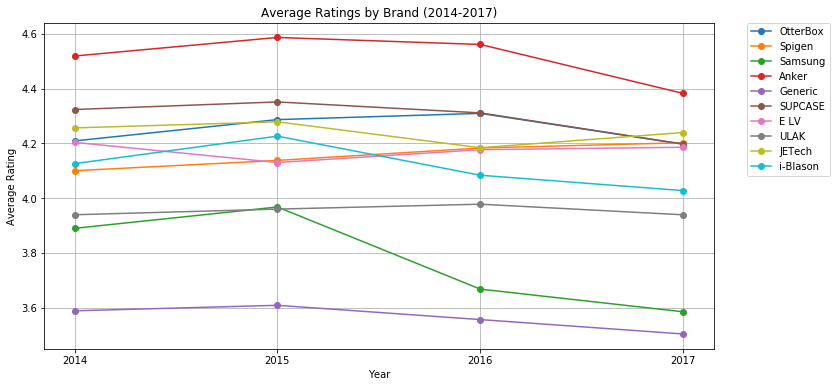

In [38]:
import matplotlib.pyplot as plt
# Collect the filtered results as a list
brand = ['Samsung','BLU','Apple','LG','Motorola','Nokia','HTC','BlackBerry','Sony','Huawei']
data_for_2014 = accessories_sorted_ratings_2014.collect()
data_for_2015 = accessories_sorted_ratings_2015.collect()
data_for_2016 = accessories_sorted_ratings_2016.collect()
data_for_2017 = accessories_sorted_ratings_2017.collect()
sorted_ratings = {
    2014: data_for_2014,
    2015: data_for_2015,
    2016: data_for_2016,
    2017: data_for_2017
}

# Brands to plot
brands_to_plot = ['OtterBox','Spigen','Samsung','Anker','Generic','SUPCASE','E LV','ULAK','JETech','i-Blason']

# Create a line chart for each year
plt.figure(figsize=(12, 6))

# for year, sorted_ratings_year in sorted_ratings.items():
#     data_by_brand = {brand: None for brand in brands_to_plot}
#     # Collect the data for the year
#     data_for_year = sorted_ratings_year.collect()
#     for brand in brands_to_plot:
#         avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
#         data_by_brand[brand] = avg_rating

# #     Create a line for each brand
#     for brand in brands_to_plot:
#         plt.plot(year, data_by_brand[brand], marker='o', label=f"{brand}")
    # Sort the ratings dictionary by year for plotting
#     for brand in brands_to_plot:
#         data_by_brand = dict(sorted(data_by_brand.items()))

#         # Create a line for each brand
#         plt.plot(year, list(data_by_brand.values()), marker='o', label=brand)
for brand in brands_to_plot:
    x = [2014,2015,2016,2017]
    y = []
#     data_for_2014 = sorted_ratings_2014.collect()
#     avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
    for year, data_for_year in sorted_ratings.items():
#         data_for_year = sorted_ratings_year
        avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
        y.append(avg_rating)
    plt.plot(x,y, marker='o', label=f"{brand}")
plt.xticks(x)    
    

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Brand (2014-2017)')
plt.legend()
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

plt.show()

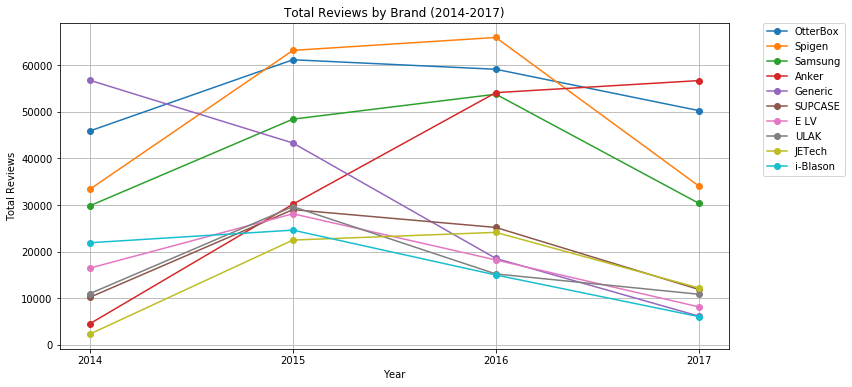

In [39]:
data_for_2014 = accessories_sorted_ratings_2014.collect()
data_for_2015 = accessories_sorted_ratings_2015.collect()
data_for_2016 = accessories_sorted_ratings_2016.collect()
data_for_2017 = accessories_sorted_ratings_2017.collect()
sorted_ratings = {
    2014: data_for_2014,
    2015: data_for_2015,
    2016: data_for_2016,
    2017: data_for_2017
}
# Brands to plot
brands_to_plot = ['OtterBox','Spigen','Samsung','Anker','Generic','SUPCASE','E LV','ULAK','JETech','i-Blason']

# Create a line chart for each year
plt.figure(figsize=(12, 6))

# for year, sorted_ratings_year in sorted_ratings.items():
#     data_by_brand = {brand: None for brand in brands_to_plot}
#     # Collect the data for the year
#     data_for_year = sorted_ratings_year.collect()
#     for brand in brands_to_plot:
#         avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
#         data_by_brand[brand] = avg_rating

# #     Create a line for each brand
#     for brand in brands_to_plot:
#         plt.plot(year, data_by_brand[brand], marker='o', label=f"{brand}")
    # Sort the ratings dictionary by year for plotting
#     for brand in brands_to_plot:
#         data_by_brand = dict(sorted(data_by_brand.items()))

#         # Create a line for each brand
#         plt.plot(year, list(data_by_brand.values()), marker='o', label=brand)
for brand in brands_to_plot:
    x = [2014,2015,2016,2017]
    y = []
#     data_for_2014 = sorted_ratings_2014.collect()
#     avg_rating = next((rating[1] for rating in data_for_year if rating[0] == brand), None)
    for year, data_for_year in sorted_ratings.items():
#         data_for_year = sorted_ratings_year
        avg_rating = next((rating[2] for rating in data_for_year if rating[0] == brand), None)
        y.append(avg_rating)
    plt.plot(x,y, marker='o', label=f"{brand}")
plt.xticks(x)    
    

plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.title('Total Reviews by Brand (2014-2017)')
plt.legend()
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

plt.show()

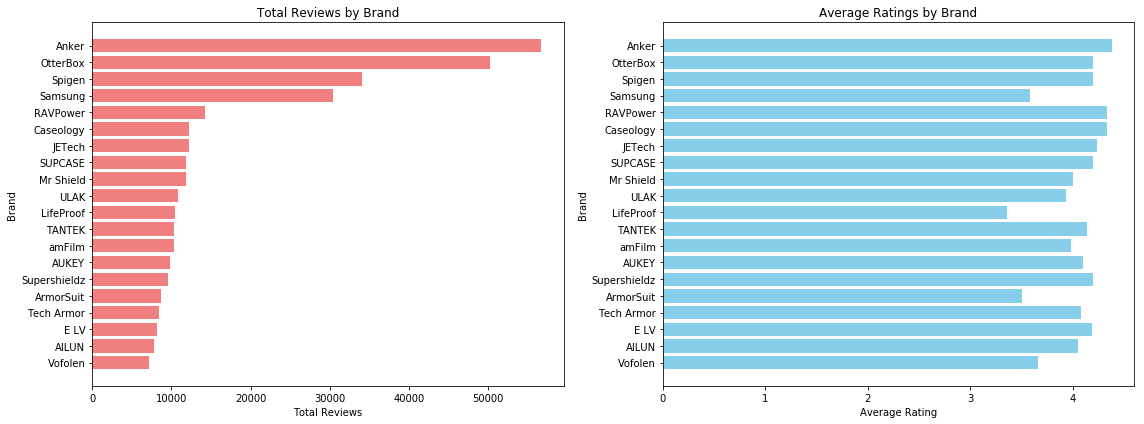

In [40]:
import matplotlib.pyplot as plt
# Collect the filtered results as a list
# brand = ['Samsung','BLU','Apple','LG','Motorola','Nokia','HTC','BlackBerry','Sony','Huawei']
accessories_2017 = accessories_filtered_results_2017.sortBy(lambda x: x[2], ascending=False)
results = accessories_2017.take(20)

# Separate the brand names and average ratings
brands = [result[0] for result in results]
average_ratings = [result[1] for result in results]
total_ratings = [result[2] for result in results]

# Create a bar plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot on the right: Total Ratings
axs[0].barh(brands, total_ratings, color='lightcoral')
axs[0].set_xlabel('Total Reviews')
axs[0].set_ylabel('Brand')
axs[0].set_title('Total Reviews by Brand')
axs[0].invert_yaxis()  # Invert the y-axis to display the highest total ratings at the top

# Plot on the left: Average Ratings
axs[1].barh(brands, average_ratings, color='skyblue')
axs[1].set_xlabel('Average Rating')
axs[1].set_ylabel('Brand')
axs[1].set_title('Average Ratings by Brand')
axs[1].invert_yaxis()  # Invert the y-axis to display the highest rating at the top


plt.tight_layout()  # Ensure the plots don't overlap
plt.show()

In [41]:
sc.stop()